### Develop LSTM Models For Univariate Time Series Forecasting

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [4]:
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [5]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [6]:
print(X),print(y)


[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [7]:
X.shape

(6, 3)

In [8]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

## Building LSTM Model

In [9]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=False, input_shape=(n_steps, n_features)))
model.add(Dense(1))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 30442.9316
Epoch 2/30
1/1 [==============================] - 0s 11ms/step - loss: 29478.2480
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 28338.6348
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 27221.7129
Epoch 5/30
1/1 [==============================] - 0s 16ms/step - loss: 26318.6543
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 25606.1348
Epoch 7/30
1/1 [==============================] - 0s 12ms/step - loss: 24993.0781
Epoch 8/30
1/1 [==============================] - 0s 10ms/step - loss: 24423.5059
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 23867.5918
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 23309.8203
Epoch 11/30
1/1 [==============================] - 0s 12ms/step - loss: 22731.1484
Epoch 12/30
1/1 [==============================] - 0s 12ms/step - loss: 22122.0781
Epoch 13/30
1/1 

## Predicting For the next 10 data

In [12]:
# demonstrate prediction for next 10 days
from numpy import array
x_input = array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):

    if(len(temp_input)>3):
        x_input=array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1


print(lst_output)

[89.45551]
1 day input [196.       210.        89.455513]
1 day output [[54.791153]]
2 day input [210.          89.455513    54.79115295]
2 day output [[39.351418]]
3 day input [89.45551  54.791153 39.351418]
3 day output [[22.069527]]
4 day input [54.791153 39.351418 22.069527]
4 day output [[12.744218]]
5 day input [39.351418 22.069527 12.744218]
5 day output [[6.82518]]
6 day input [22.069527 12.744218  6.82518 ]
6 day output [[2.8723223]]
7 day input [12.744218   6.82518    2.8723223]
7 day output [[1.0062658]]
8 day input [6.82518   2.8723223 1.0062658]
8 day output [[0.33877045]]
9 day input [2.8723223  1.0062658  0.33877045]
9 day output [[0.1313253]]
[89.45551, 54.791153, 39.351418, 22.069527, 12.744218, 6.82518, 2.8723223, 1.0062658, 0.33877045, 0.1313253]


In [13]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [14]:
len(timeseries_data)

9

In [15]:
lst_output

[89.45551,
 54.791153,
 39.351418,
 22.069527,
 12.744218,
 6.82518,
 2.8723223,
 1.0062658,
 0.33877045,
 0.1313253]

## Visualizaing The Output

In [16]:
import matplotlib.pyplot as plt

In [17]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

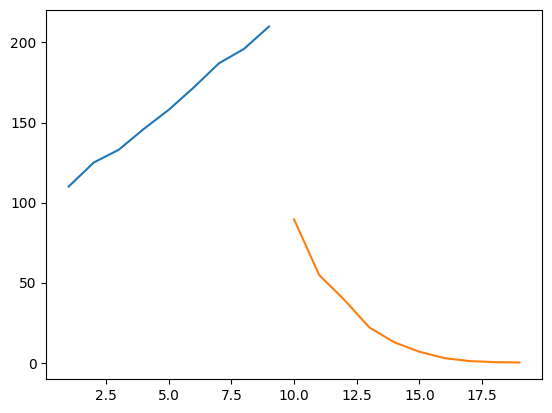

In [18]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)